# Simple Linear Regression 

In this example we will consider sales based on 'TV' marketing budget. 

In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.


## Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
import pandas as pd

In [2]:
# Reading csv file from github repo
dataset_file_path  = "tvmarketing.csv"
advertising = pd.read_csv(dataset_file_path)

Now, let's check the structure of the advertising dataset.

In [3]:
# Display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [8]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [4]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [6]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualising Data Using Plot

<AxesSubplot:xlabel='TV', ylabel='Sales'>

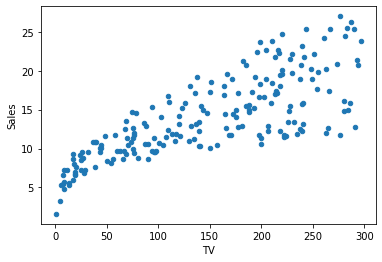

In [8]:
# Visualise the relationship between the 
# features and the response using scatterplots
advertising.plot(x='TV',y='Sales',kind='scatter')

# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```statsmodels```

Before you read further, it is good to understand the generic structure of modeling using the statsmodels library. Broadly, the steps to build any model can be divided as follows: 

## Selecting a model

-  The statsmodels module provides classes and functions for the estimation of many different statistical models. You can use R-Style formulas and pandas dataframes as input. In this hands on, you will use the Ordinary Least Squares regression.

In [3]:
# Import the statsmodels library
import statsmodels.formula.api as smf

# Define a formula - Sales is explained by TV
formula = 'Sales ~ TV'

# Create an untrained model using OLS Regression
model = smf.ols(formula,advertising)

# Check that the internal parameters have not yet been trained
if not hasattr(model,'params'):
    print('Model selected but not yet trained')

Model selected but not yet trained


## Performing Linear Regression

OLS models have two parameters (slope and intercept), you will train/fit the model to find values for each of these parameters so that you can predict the sales using the value of TV.

In [4]:
# Train (fit) the sales model
fitted_model = model.fit()

# Print the internal parameters of the trained model
print(f"Slope: {fitted_model.params[1]}")
print(f"Intercept: {fitted_model.params[0]}")

Slope: 0.047536640433019736
Intercept: 7.032593549127695


## Coefficients Calculation

$y = 7.032 + 0.0475 \times TV $<br>

Now, let's use this equation to predict our sales.

## Predictions

In [5]:
import random
# Making predictions on some sample values
sample = advertising.iloc[random.randint(0,advertising.TV.count() - 1)]
tv_value = {'TV': [sample.TV]}
approximate_sales = fitted_model.predict(tv_value)[0]

print(f"Sample Sales: {sample.Sales}, Estimate Sales:{approximate_sales}, Absolute Error = {abs(sample.Sales - approximate_sales)}")

Sample Sales: 17.1, Estimate Sales:15.446578905772189, Absolute Error = 1.653421094227813


In [6]:
# Save a model to a file
import joblib

model_filename = './sales_model.pkl'
joblib.dump(fitted_model,model_filename)

['./sales_model.pkl']

In [7]:
# Load a model from a file
import joblib

model_filename = './sales_model.pkl'
loaded_model = joblib.load(model_filename)
print(loaded_model.params)

Intercept    7.032594
TV           0.047537
dtype: float64
